In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('WineQT.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [56]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

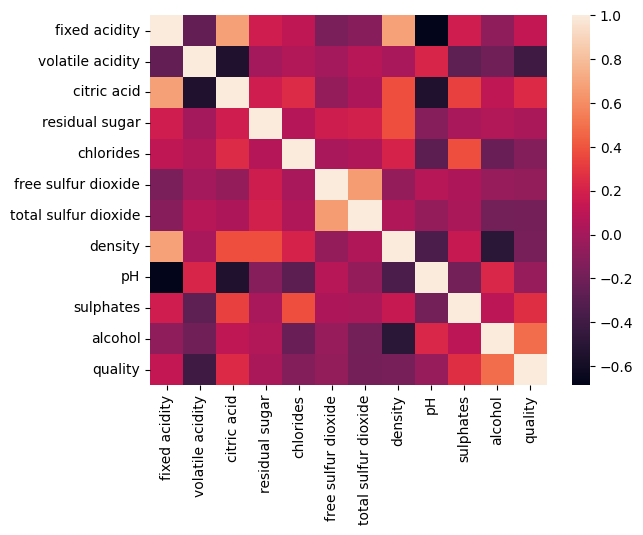

In [5]:
sns.heatmap(dataset.corr())

In [6]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

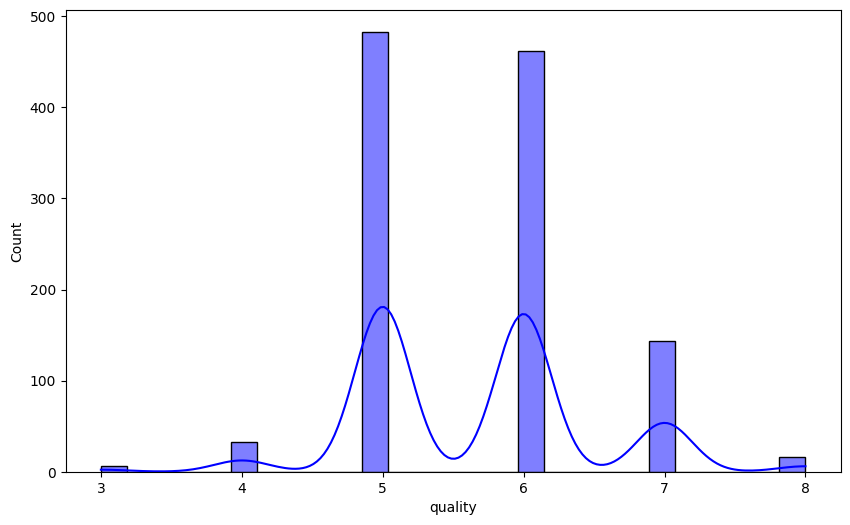

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['quality'], kde=True, color='blue')
plt.show()

In [10]:
null_values=dataset.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X=dataset.drop('quality', axis=1)

Y=dataset['quality']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [26]:
X_train.shape

(914, 11)

In [25]:
Y_train.shape

(914,)

In [27]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train, Y_train)



LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_pred, Y_test)

r2=r2_score(Y_pred, Y_test)


print("MSE: ", mse)

print("R2: ",r2)

MSE:  0.3800324502645381
R2:  -0.39626976769544275


In [29]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
new_inputs=[[7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]]

preds=model.predict(new_inputs)

preds[0]

c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5.058136093094145

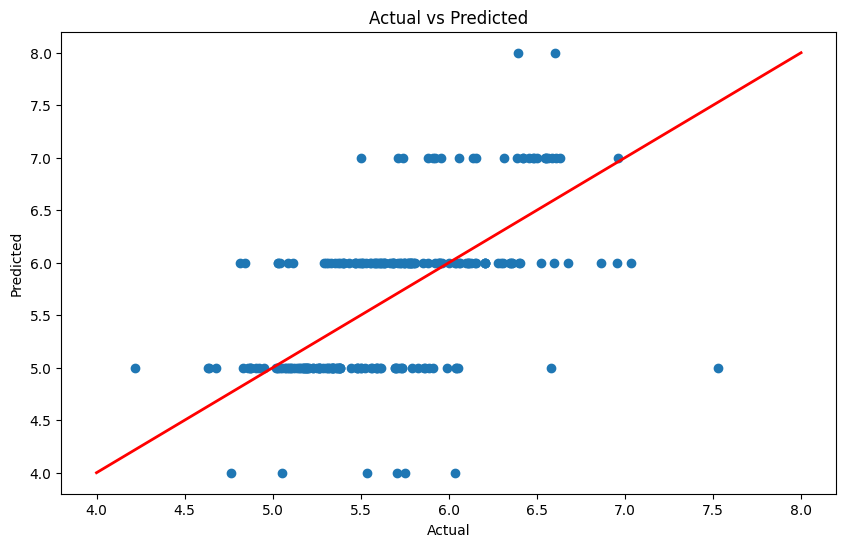

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(Y_pred, Y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [54]:
newset_of_inputs=pd.read_csv('WineQT.csv')
newset_of_inputs=newset_of_inputs.drop('quality', axis=1)

newset_of_inputs=pd.DataFrame(newset_of_inputs)

preds=model.predict(newset_of_inputs)

for i in preds:
    print("Quality: ",preds[0])



Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.0581360930941415
Quality:  5.05